<a href="https://colab.research.google.com/github/ednaelxd/clients_profile/blob/main/client_profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final da disciplina Modelo Descritivo

## Equipe:

* Ednael Vieira
* Priscilla Amarante

## Entregáveis: código e relatório

1) objetivo; 

2) metodologia; 

3) análise de resultados; 

4) considerações finais.


# Dataset

Neste projeto, iremos realizar um agrupamento não supervisionado de dados nos registros do cliente do banco de dados de uma empresa de alimentos. A segmentação de clientes é a prática de separar os clientes em grupos que refletem semelhanças entre os clientes em cada cluster. Vamos dividir os clientes em segmentos para otimizar a importância de cada cliente para o negócio. Modificar produtos de acordo com necessidades e comportamentos distintos dos clientes. Também ajuda a empresa a atender às preocupações de diferentes tipos de clientes.
Nossa base de dados pode ser acessada no Kaggle, em https://www.kaggle.com/karnikakapoor/customer-segmentation-clustering/data

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Exploratory Data Analysis

In [123]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")

In [124]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [126]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [127]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [128]:
def show_value_counts(serie, value_counted=False, dask=False, column_desc=None, grain='Rows', 
                      size=None, total=None, title=None, height=10, width=5, index=None, save_to=False, ax=None):
    fig = plt.figure()
    fig.set_size_inches(width, height)

    if ax is None:
        print('criando outro eixo') 
        ax = plt.subplot(1,1,1)

    if not value_counted:
        serie = serie.value_counts()
    
    if dask:
        serie = serie.compute()
        
    serie = serie.sort_values(ascending=True)

    if not total:
        total = serie.sum()
    
    corte = ''
    
    if (index):
        serie = serie.rename(index)
    
    if serie.index.dtype != 'object':
        if serie.index.dtype == 'float64':
            serie.index = serie.index.map(int)
        serie.index = serie.index.map(str)
    serie.index = serie.index.map(str)
    
    if size and len(serie) > size:
        serie = serie.sort_values(ascending=False)
        serie = serie[:size]
        serie = serie.sort_values(ascending=True)
        corte = ' ({} mais frequentes)'.format(size)
    
    if not title:
        if column_desc:
            column = column_desc
        else:
            column = serie.name
        title = "{} by {}{}".format(grain, column, corte)
   
    ax.barh(serie.index, serie, align='center', color='c', ecolor='black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    percentage = serie/total*100
    number_distance = serie.max()*0.005
    
    for i, v in enumerate(serie):
        pct = locale.format_string('%.2f', percentage[i], True)
        ax.text(v+number_distance , i-0.2, '{0:,} ({1}%)'.format(v, pct), color='k')
    ax.set(title=title,
           xlabel='',
           ylabel='')
    sns.despine(left=True, bottom=True)

    if save_to:
        plt.savefig(save_to)
    # plt.show()

In [129]:
def plot_grid(functions_and_parameters, n_cols=3, values_mapping=None, width_scale=5.5, height_scale=4):
    Tot = len(functions_and_parameters)
    # Compute Rows required
    n_rows = Tot // n_cols
    n_rows += Tot % n_cols
    fig = plt.figure(1)
    fig.set_figwidth(n_cols*width_scale)
    fig.set_figheight(n_rows*height_scale)
    for position, functions_and_parameter in enumerate(functions_and_parameters):
        ax = fig.add_subplot(n_rows, n_cols, position+1)
        kwargs = {'ax': ax}
        function = functions_and_parameter[0]
        parameters = functions_and_parameter[1]
        function(**parameters, **kwargs)
    plt.show()

In [130]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [169]:
categorical_columns = ['Marital_Status', 'Education']

In [170]:
train_plotting_infos = [{'serie': data[column]} for column in categorical_columns]

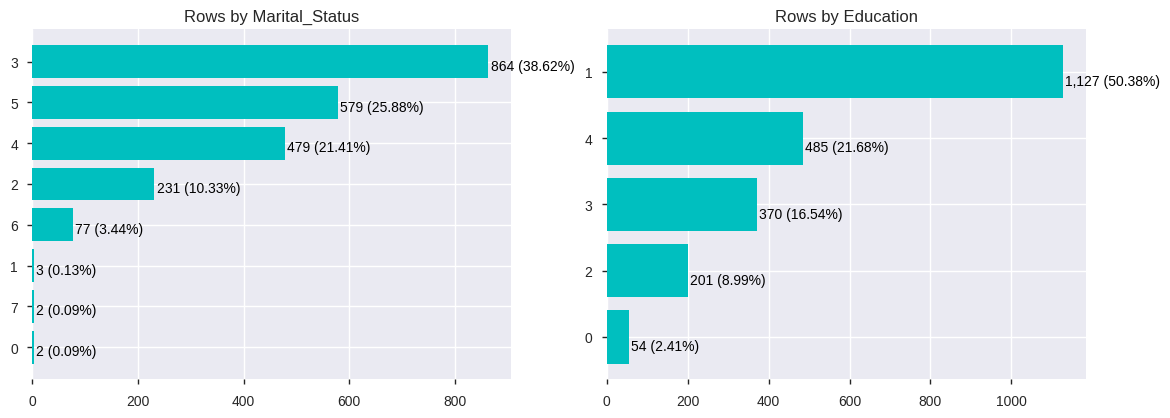

<Figure size 500x1000 with 0 Axes>

<Figure size 500x1000 with 0 Axes>

In [171]:
plot_grid([[show_value_counts, plotting_info] for plotting_info in train_plotting_infos], 
            n_cols=3, width_scale=7, height_scale=5)

## Compreensão de dados

- Esta fase é dedicada a uma exploração mais detalhada de Dados para obter uma melhor compreensão das características e suas inter-relações.

1. Age: Idade (15 - 80)
2. Education: Educação
3. Marital_Status: Estado civil - cat
4. Income: Renda
5. Dt_Customer: Data de inscrição do cliente na empresa
6. Recency: Número de dias desde a última compra do cliente
7. MntWines: Valor gasto em vinho
8. MntFruits: Valor gasto em frutas
9. MntMeatProducts: Valor gasto em carnes
10. MntFishProducts: Valor gasto em peixes
11. MntSweetProducts: Valor gasto com doces
12. MntGoldProds: 
13. NumDealsPurchases: Números de compras de ofertas
14. NumWebPurchases: Número de compras de aplicativos
15. NumCatalogPurchases: Número de compras de catálogo
16. NumStorePurchases: Número de compras na loja
17. NumWebVisitsMonth: Número de visitas na Web por mês
18. num_filhos: Número de filhos
19. Camp_Aceitas: 

As demais colunas com os demais fatores, por apresentarem uma relevância menor (o que não indica que seja inexistente), serão *dropadas* para fins de análise **neste** estudo.

Encoding - Categóricos

In [134]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [135]:
def ordinal_encoder(value):
    if value == 'Basic':
        return 0
    elif value == 'Graduation':
        return 1
    elif value == '2n Cycle':
        return 2
    elif value == 'Master':
        return 3
    elif value == 'PhD':
        return 4

data['Education'] = data.Education.apply(ordinal_encoder)

In [136]:
enc = LabelEncoder()
data['Marital_Status']=enc.fit_transform(data['Marital_Status'])

In [137]:
enc2 = LabelEncoder()
data['Dt_Customer']=enc.fit_transform(data['Dt_Customer'])

In [138]:
# Agregando número de filhos
data['num_filhos']=data['Kidhome']+data['Teenhome']
data.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

In [139]:
data['Year_Birth'] = 2022 - data['Year_Birth']

In [140]:
data.rename({'Year_Birth':'Age'},axis=1,inplace=True)

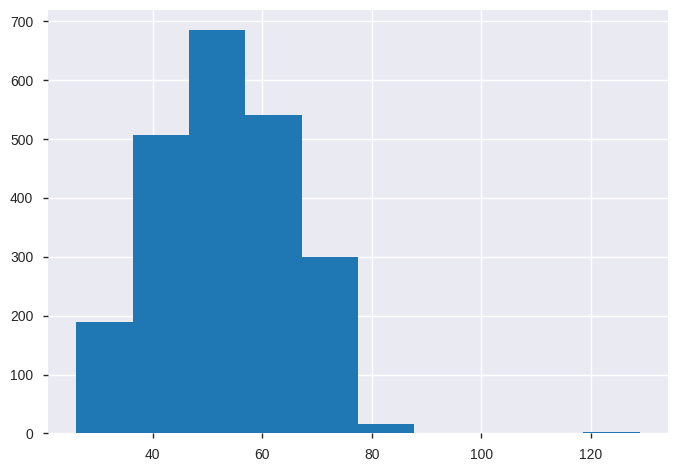

In [141]:
data['Age'].hist()

In [142]:
#Removendo outliers na idade
data = data[data['Age']<100]

In [143]:
#Removendo variáveis sem documentação
data.drop(['Z_Revenue','Z_CostContact'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [144]:
#Agregando as informações de compra
data['Camp_Aceitas'] = (data['AcceptedCmp3'] + data['AcceptedCmp4'] + 
                    data['AcceptedCmp5'] + data['AcceptedCmp1'] + data['AcceptedCmp2'])
    
data.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
         'AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Encoding - Numéricos

In [145]:
norm_Z = StandardScaler()
df_copiado = data.copy()

df_norm = pd.DataFrame(norm_Z.fit_transform(df_copiado),columns=df_copiado.columns)

In [146]:
df_norm.describe()

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_filhos,Camp_Aceitas
count,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.213000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03,2.237000e+03
mean,2.054682e-17,5.776932e-17,-1.706279e-16,2.367351e-16,-5.986481e-17,1.463061e-16,9.005363e-17,4.307884e-17,-6.397307e-17,-7.149201e-17,9.826739e-18,-1.558382e-17,-5.449374e-17,5.541189e-17,9.303143e-17,-4.352551e-17,-1.950459e-17,5.970489e-17,1.095830e-16,2.840325e-16
std,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000226e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00,1.000224e+00
min,-1.723196e+00,-2.316236e+00,-1.602898e+00,-3.467227e+00,-2.006386e+00,-1.723382e+00,-1.696210e+00,-9.034065e-01,-6.616060e-01,-7.398445e-01,-6.868864e-01,-6.556625e-01,-8.448586e-01,-1.204030e+00,-1.470819e+00,-9.109389e-01,-1.782765e+00,-2.192713e+00,-1.264618e+00,-4.388155e-01
25%,-8.512305e-01,-6.922077e-01,-8.198270e-01,-6.785691e-01,-6.749549e-01,-8.660527e-01,-8.671831e-01,-8.320839e-01,-6.364216e-01,-6.689259e-01,-6.319692e-01,-6.314405e-01,-6.719236e-01,-6.865630e-01,-7.510942e-01,-9.109389e-01,-8.597490e-01,-9.560294e-01,-1.264618e+00,-4.388155e-01
50%,-4.183415e-02,-9.388133e-02,-8.198270e-01,2.509833e-01,-3.430598e-02,-8.723046e-03,-3.613327e-03,-3.863176e-01,-4.601307e-01,-4.428728e-01,-4.672176e-01,-4.618862e-01,-3.836987e-01,-1.690962e-01,-3.136932e-02,-2.266641e-01,-2.444047e-01,2.806540e-01,6.540104e-02,-4.388155e-01
75%,8.742077e-01,8.463457e-01,7.463156e-01,1.180536e+00,6.455518e-01,8.275679e-01,8.599565e-01,5.943684e-01,1.694798e-01,2.884754e-01,2.284002e-01,1.436647e-01,2.311812e-01,3.483706e-01,6.883555e-01,4.576107e-01,6.786117e-01,6.928818e-01,6.540104e-02,-4.388155e-01
max,1.726139e+00,2.470374e+00,1.529387e+00,3.039641e+00,2.440836e+01,1.758533e+00,1.723526e+00,3.533455e+00,4.350093e+00,6.906069e+00,4.054298e+00,5.714733e+00,6.110971e+00,6.557972e+00,8.245467e+00,8.668909e+00,2.216972e+00,6.051843e+00,2.725440e+00,5.456862e+00


In [147]:
norm_MinMax = MinMaxScaler()
df_copiado2 = data.copy()

df_norm2 = pd.DataFrame(norm_MinMax.fit_transform(df_copiado2),columns=df_copiado2.columns)

In [148]:
df_norm2.describe()

,ID,Age,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_filhos,Camp_Aceitas
count,2237.000000,2237.000000,2237.000000,2237.000000,2213.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,0.499573,0.483899,0.511734,0.532857,0.075957,0.494952,0.496006,0.203614,0.132012,0.096763,0.144877,0.102923,0.121461,0.155118,0.151377,0.095089,0.445721,0.265959,0.316942,0.074430
std,0.289976,0.208963,0.319327,0.153718,0.037866,0.287262,0.292486,0.225435,0.199578,0.130818,0.210965,0.157011,0.143796,0.128862,0.102943,0.104409,0.250072,0.121319,0.250679,0.169654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252792,0.339286,0.250000,0.428571,0.050405,0.246224,0.242424,0.016075,0.005025,0.009275,0.011583,0.003802,0.024862,0.066667,0.074074,0.000000,0.230769,0.150000,0.000000,0.000000
50%,0.487445,0.464286,0.250000,0.571429,0.074658,0.492447,0.494949,0.116544,0.040201,0.038841,0.046332,0.030418,0.066298,0.133333,0.148148,0.071429,0.384615,0.300000,0.333333,0.000000
75%,0.753016,0.660714,0.750000,0.714286,0.100396,0.732628,0.747475,0.337575,0.165829,0.134493,0.193050,0.125475,0.154696,0.200000,0.222222,0.142857,0.615385,0.350000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Correlação

- Teste de Spearman, para os dados originalmente numéricos
- V de Cramer para os dados originalmente categóricos
  - Este teste é usado para medir a força da associação entre duas variáveis ​​nominais

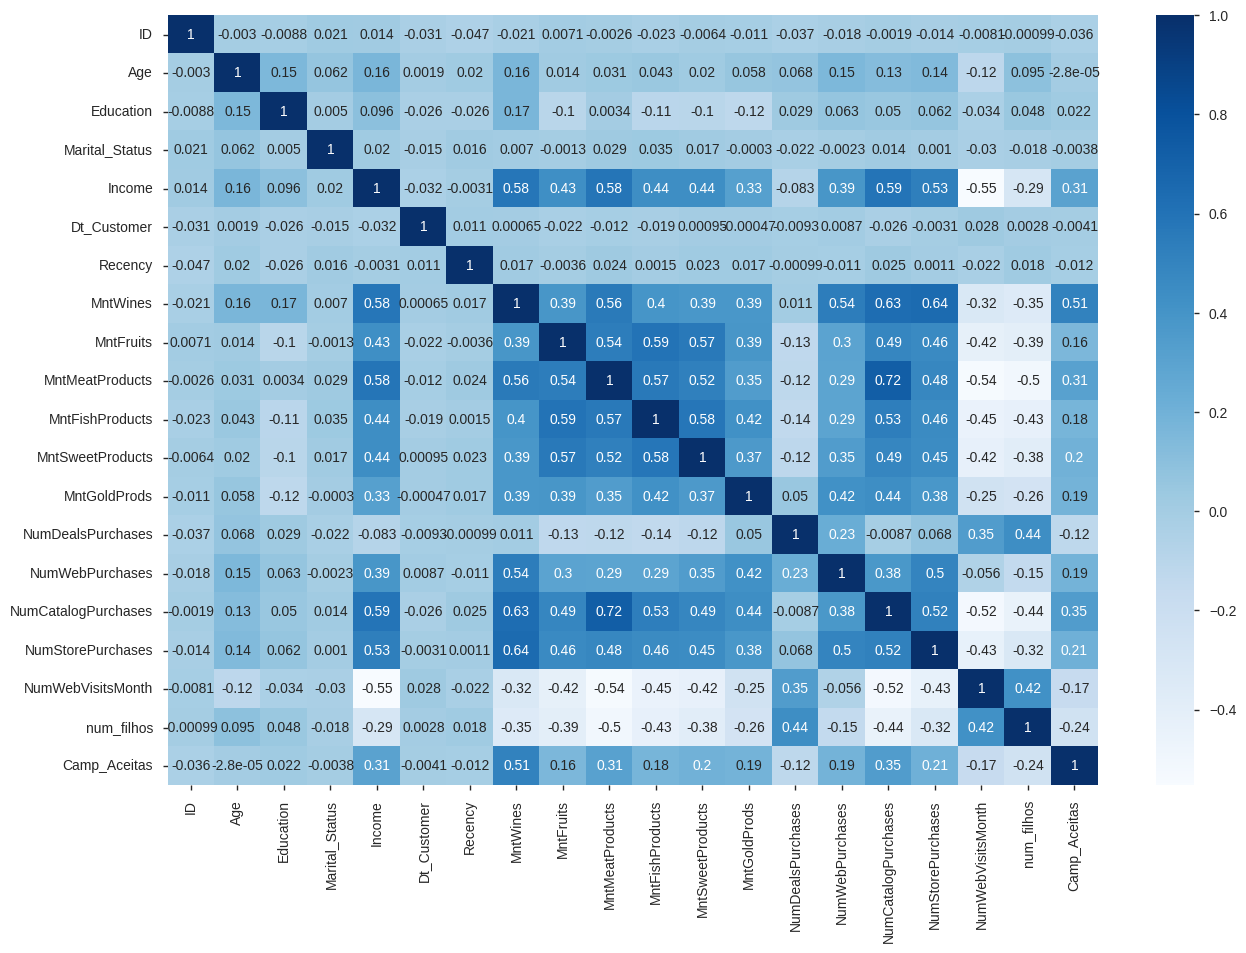

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(df_norm2.corr(),annot=True,cmap="Blues")

In [150]:
data_cat=df_norm2[['Marital_Status', 'Education']]

In [151]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data_cat.columns :
  data_encoded[i]=label.fit_transform(data_cat[i])

In [152]:
data_encoded.head()

,Marital_Status,Education
0,4,1
1,4,1
2,5,1
3,5,1
4,3,4


#Construção da função V de Cramer

In [153]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [154]:
# Building of the confusion matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

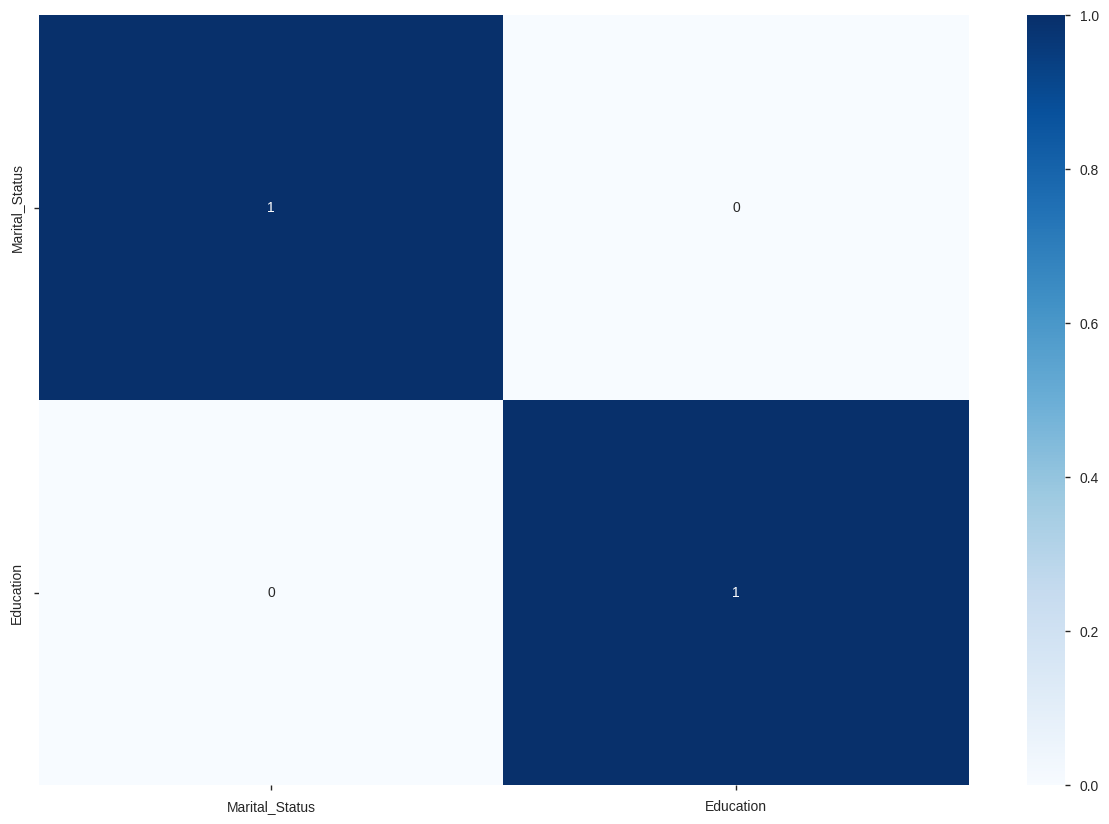

In [155]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(df,annot=True,cmap="Blues")

## Pandas Profile

In [156]:
from pandas_profiling import ProfileReport

In [162]:
profile_train = ProfileReport(df_norm2, title="Customer Segmentation Dataset")

TypeError: ignored

In [ ]:
profile_train.to_file('Train Customer Segmentation datasetreport.html')

In [ ]:
from IPython.display import IFrame

IFrame(src='./Train Customer Segmentation datasetreport.html', width=800, height=600)